In [2]:
import pandas as pd
import re
from urllib.request import Request, urlopen
import urllib.error
import urllib.parse
import ssl
import urllib.request
from bs4 import BeautifulSoup as BS
from operator import itemgetter 

In [3]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

#Scrap the web at Feb. 25 2020, Run again will overrwrite the excel
#Please dont run this part again 

urls =[]
url = 'https://www.mlslistings.com/Search/Result/a51b2d23-79e9-460e-8c1e-2abba8467f9d/'
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
htmlfile = urlopen(req)
htmltext = htmlfile.read()
text = htmltext.decode(encoding = 'utf8', errors = 'ignore')
s = BS(text, 'html.parser')
li = s.findAll('a', attrs = {'class':'page-link'})
for link in li:
    #print(link['href'])
    urls.append('https://www.mlslistings.com/'+ link['href'])
#print(urls)
count = 0
for web in urls:
    req = Request(web, headers={'User-Agent': 'Mozilla/5.0'})
    htmlfile = urlopen(req)
    htmltext = htmlfile.read()
    text = htmltext.decode(encoding = 'utf8', errors = 'ignore')
    soup = BS(text, 'html.parser')
    #Get housing address
    addrs =[]
    addr = soup.findAll('h5', attrs = {'class' :'card-title font-weight-bold listing-address mb-25'})
    for a in addr:
        addrs.append(a.text)
    #print(addrs)
    prices =[]
    price = soup.findAll('span', attrs = {'class' :'font-weight-bold listing-price d-block pull-left pr-25'})
    for p in price:
        prices.append(p.text)
    #print(prices)
    sold_on =[]
    sold = soup.findAll('span', attrs = {'class' :'listing-statusd-block pull-left pl-50 pr-1 status-marker status-closed'})
    for s in sold:
        sold_on.append(s.text)
    #print(sold_on)
    status = []
    statu = soup.findAll('span', attrs = {'class' :'listing-dom-block pull-left pl-25 hidden'})
    for st in statu:
        status.append(st.text)
    #print(status)
    types =[]
    type = soup.findAll('div', attrs = {'class': 'listing-info clearfix font-size-sm line-height-base listing-type mb-25'})
    for t in type:
        types.append(t.text.strip())
    #print(types)
    #MLS number
    mls =[]
    ml = soup.findAll('span', attrs = {'class' :'info-item-label d-block pull-left font-weight-bold'})
    for m in ml:
        mls.append(m.text.strip())
    #print(mls)
    cards =[]
    card = soup.findAll('span', attrs = {'class':'font-weight-bold info-item-value d-block pull-left pr-25'})
    for c in card:
        #print(c)
        cards.append(c.text.strip())
        #the cards included 'beds, baths, sqfts, loot sqft, gassage, year build'
    #print(cards[0:6])
    #print(cards)
    #print(len(cards))
    ca =[]
    u = 0
    while 6*(u+1) <= len(cards):
        ca.append(cards[6*u:6*u+6])
        u+=1
    #print(ca)
    beds = list(map(itemgetter(0), ca))
    baths = list(map(itemgetter(1),ca))
    sqfts = list(map(itemgetter(2),ca))
    lsqs = list(map(itemgetter(3),ca))
    gas = list(map(itemgetter(4),ca))
    years = list(map(itemgetter(5),ca))
    #Agent
    agnts =[]
    agnt = soup.findAll('span', attrs = {'class':'font-weight-bold info-item-value d-block pull-left link'})
    for ag in agnt:
        agnts.append(ag.text)
    #phone
    phos = []
    pho = soup.findAll('span', attrs = {'class':'info-item-label font-weight-bold d-block pull-left'})
    for p in pho:
        phos.append(p.text)
    data =[]
    for a,p,s,t,m,be,ba,sq,ls,ga,ye,agn,ph in zip(addrs,prices,sold_on,types,mls,beds,baths,sqfts,lsqs,gas,years,agnts,phos):
        data.append({'Address': a, 'Sold Price': p, 'Sold Date': s, 'House Type': t, 'ML Number': m, 'Beds':be,'Baths':ba,'Squart Foot':sq,'Sq Ft Lt':ls,'Garage':ga,'Year Build':ye, 'Agent': agn,'Phone Number':ph})
    df = pd.DataFrame(data)
    #Save every page data from each web pages to excel files
    excel = ['SF1.xlsx', 'SF2.xlsx','SF3.xlsx','SF4.xlsx','SF5.xlsx','SF6.xlsx','SF7.xlsx','SF8.xlsx','SF9.xlsx','SF10.xlsx']
    writer=pd.ExcelWriter(excel[count]) # Create an excel called 'test4.xlsx'
    df.to_excel(writer,'SF_housing')
    writer.save()
    count+=1

In [6]:
#combain all excels to one excel 
import glob
df1 = pd.read_excel('SF1.xlsx','SF_housing')
df2 = pd.read_excel('SF2.xlsx','SF_housing')
df3 = pd.read_excel('SF3.xlsx','SF_housing')
df4 = pd.read_excel('SF4.xlsx','SF_housing')
df5 = pd.read_excel('SF5.xlsx','SF_housing')
df6 = pd.read_excel('SF6.xlsx','SF_housing')
df7 = pd.read_excel('SF7.xlsx','SF_housing')
df8 = pd.read_excel('SF8.xlsx','SF_housing')
df9 = pd.read_excel('SF9.xlsx','SF_housing')
all_data = pd.DataFrame()
for f in glob.glob("SF*.xlsx"):
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=True,sort = True)
print(all_data)
writer=pd.ExcelWriter('SF_housing.xlsx') # Create an excel called 'test4.xlsx'
all_data.to_excel(writer,'SF_housing')
writer.save()

                                               Address                Agent  \
0             675 Prentiss St, San Francisco, CA 94110  Sally Anne Peterson   
1             936 Olmstead St, San Francisco, CA 94134       Fair Gutierrez   
2        1880 Steiner St #409, San Francisco, CA 94115       Brandon Denman   
3               259 Wilson St, San Francisco, CA 94112    Carlos Barrientos   
4      501 Crescent Way #5212, San Francisco, CA 94134            Haiyan Fu   
5     451 Stoneridge Ln #3102, San Francisco, CA 94134            Rachel Ni   
6                115 Colby St, San Francisco, CA 94134       Julie Phan Boc   
7                643 40th Ave, San Francisco, CA 94121            Alana Shi   
8             1055 Gilman Ave, San Francisco, CA 94124          Patrick Lam   
9                1863 Pine St, San Francisco, CA 94109            Alex Lehr   
10               647 34th Ave, San Francisco, CA 94121        Kevin Pickett   
11                210 Rose St, San Francisco, CA 941

In [2]:
cd = pd.read_excel('SF_draft.xlsx','SF_housing', index = True)
cd


,Address,City,State,Zip Code,Baths,Beds,House Type,Sold Price,Sqft,Year Build
0,675 Prentiss St,San Francisco,CA,94110,1,3,Single Family Residence,"$1,150,000","1,204",1959
1,936 Olmstead St,San Francisco,CA,94134,1,2,Single Family Residence,"$1,100,000","1,016",1952
2,1880 Steiner St #409,San Francisco,CA,94115,2,2,Condominium,"$1,261,000",983,1999
3,259 Wilson St,San Francisco,CA,94112,1,2,Single Family Residence,"$875,000",880,1914
4,501 Crescent Way #5212,San Francisco,CA,94134,2,2,Condominium,"$760,000",875,2006
5,451 Stoneridge Ln #3102,San Francisco,CA,94134,2,2,Condominium,"$750,000","1,068",1996
6,115 Colby St,San Francisco,CA,94134,3,3,Single Family Residence,"$1,750,000","1,715",1970
7,643 40th Ave,San Francisco,CA,94121,1/1,3,Single Family Residence,"$1,610,000","1,448",1924
8,1055 Gilman Ave,San Francisco,CA,94124,1,2,Single Family Residence,"$800,000",950,1908
9,1863 Pine St,San Francisco,CA,94109,1/1,3,Single Family Residence,"$1,485,000","1,390",1900


In [3]:
cd = cd.replace('1/1','1.5')
cd = cd = cd.replace('4/1','4.5')
cd = cd.replace('3/1','3.5')
cd = cd.replace('2/1','2.5')
cd['Sold Price'] = cd['Sold Price'].str.replace('$','')
cd

,Address,City,State,Zip Code,Baths,Beds,House Type,Sold Price,Sqft,Year Build
0,675 Prentiss St,San Francisco,CA,94110,1,3,Single Family Residence,"1,150,000","1,204",1959
1,936 Olmstead St,San Francisco,CA,94134,1,2,Single Family Residence,"1,100,000","1,016",1952
2,1880 Steiner St #409,San Francisco,CA,94115,2,2,Condominium,"1,261,000",983,1999
3,259 Wilson St,San Francisco,CA,94112,1,2,Single Family Residence,"875,000",880,1914
4,501 Crescent Way #5212,San Francisco,CA,94134,2,2,Condominium,"760,000",875,2006
5,451 Stoneridge Ln #3102,San Francisco,CA,94134,2,2,Condominium,"750,000","1,068",1996
6,115 Colby St,San Francisco,CA,94134,3,3,Single Family Residence,"1,750,000","1,715",1970
7,643 40th Ave,San Francisco,CA,94121,1.5,3,Single Family Residence,"1,610,000","1,448",1924
8,1055 Gilman Ave,San Francisco,CA,94124,1,2,Single Family Residence,"800,000",950,1908
9,1863 Pine St,San Francisco,CA,94109,1.5,3,Single Family Residence,"1,485,000","1,390",1900


In [ ]:
#write cd to a new excel
writer=pd.ExcelWriter('SF_houses.xlsx') # Create an excel called 'test4.xlsx'
cd.to_excel(writer,'SF_house')
writer.save()

In [29]:
#Here is individual part of the project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
c = pd.read_excel('SF_houses.xlsx', 'SF_house')
c.dtypes

Address        object
City           object
State          object
Zip Code        int64
Bath          float64
Bed             int64
House Type     object
Sold Price      int64
Sqft            int64
Year Build      int64
dtype: object

In [3]:
#change types of some columns 
c = c.astype({'Address':'str','City':'str','State':'str','Zip Code':'int64','Bed':'float', 'Bath':'float','House Type':'str', 'Sold Price':'float', 'Sqft':'float', 'Year Build':'str'})
c.dtypes
#save the new data frame to a csv file
c.to_csv('SF_houses.csv', index=False)


In [30]:
#read the csv file
csv = pd.read_csv('SF_houses.csv')
csv

,Address,City,State,Zip Code,Bath,Bed,House Type,Sold Price,Sqft,Year Build
0,675 Prentiss St,San Francisco,CA,94110,1.0,3.0,Single Family Residence,1150000.0,1204.0,1959
1,936 Olmstead St,San Francisco,CA,94134,1.0,2.0,Single Family Residence,1100000.0,1016.0,1952
2,1880 Steiner St #409,San Francisco,CA,94115,2.0,2.0,Condominium,1261000.0,983.0,1999
3,259 Wilson St,San Francisco,CA,94112,1.0,2.0,Single Family Residence,875000.0,880.0,1914
4,501 Crescent Way #5212,San Francisco,CA,94134,2.0,2.0,Condominium,760000.0,875.0,2006
5,451 Stoneridge Ln #3102,San Francisco,CA,94134,2.0,2.0,Condominium,750000.0,1068.0,1996
6,115 Colby St,San Francisco,CA,94134,3.0,3.0,Single Family Residence,1750000.0,1715.0,1970
7,643 40th Ave,San Francisco,CA,94121,1.5,3.0,Single Family Residence,1610000.0,1448.0,1924
8,1055 Gilman Ave,San Francisco,CA,94124,1.0,2.0,Single Family Residence,800000.0,950.0,1908
9,1863 Pine St,San Francisco,CA,94109,1.5,3.0,Single Family Residence,1485000.0,1390.0,1900


count     510.000000
mean     1950.309804
std        34.208452
min      1878.000000
25%      1923.000000
50%      1944.000000
75%      1976.500000
max      2018.000000
Name: Year Build, dtype: float64


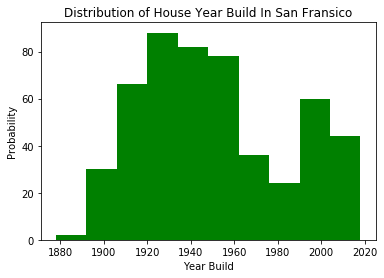

In [5]:
#statistical analysis summary for Year Build
print(csv['Year Build'].describe())
#Distribution of year build about San Fransico's houses
x = csv['Year Build']
num_bins = 10
plt.hist(x,color = 'g') 
plt.xlabel('Year Build')
plt.ylabel('Probability')
plt.title('Distribution of House Year Build In San Fransico')
plt.show()

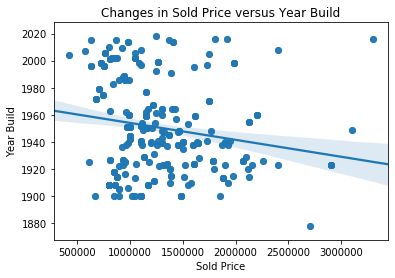

In [24]:
#Year Build vs Sold Price
sns.regplot('Sold Price','Year Build',data=csv)
plt.title('Changes in %s versus %s' %('Sold Price','Year Build'))
plt.show()

count    5.100000e+02
mean     1.297421e+06
std      4.878433e+05
min      4.221500e+05
25%      9.462500e+05
50%      1.175000e+06
75%      1.550000e+06
max      3.300000e+06
Name: Sold Price, dtype: float64


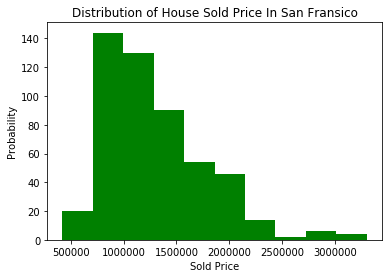

In [6]:
#statistical analysis summary for Sold Price
print(csv['Sold Price'].describe())
#Distribution of House Sold Price In San Fransico
x = csv['Sold Price']
num_bins = 10
plt.hist(x,color = 'g') 
plt.xlabel('Sold Price')
plt.ylabel('Probability')
plt.title('Distribution of House Sold Price In San Fransico')
plt.show()

Statistical analysis summary for Condominium in SF:
 count    1.620000e+02
mean     1.071299e+06
std      4.405808e+05
min      4.221500e+05
25%      7.600000e+05
50%      9.500000e+05
75%      1.261000e+06
max      3.300000e+06
Name: Sold Price, dtype: float64 

Statistical analysis summary for Single Family Residence in SF:
 count    3.340000e+02
mean     1.399624e+06
std      4.744655e+05
min      6.670000e+05
25%      1.000654e+06
50%      1.300000e+06
75%      1.640000e+06
max      3.100000e+06
Name: Sold Price, dtype: float64 

Statistical analysis summary for Townhouse in SF:
 count    1.400000e+01
mean     1.475714e+06
std      4.560991e+05
min      9.900000e+05
25%      1.112500e+06
50%      1.150000e+06
75%      1.980000e+06
max      1.980000e+06
Name: Sold Price, dtype: float64 



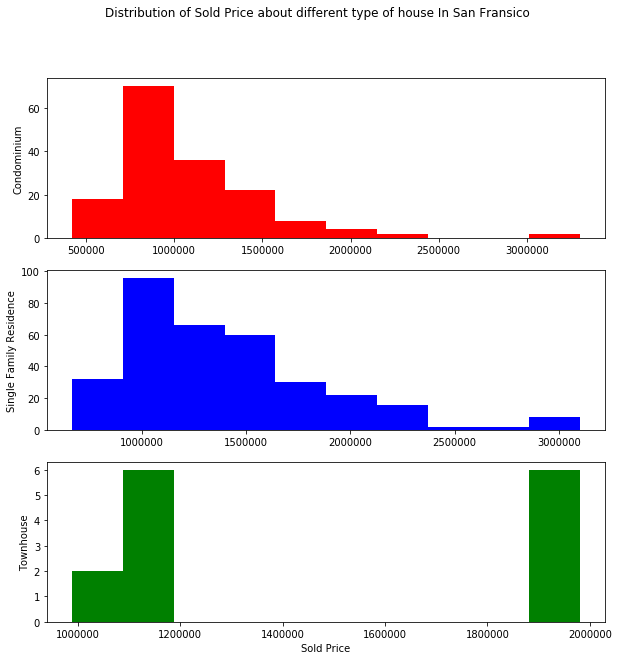

In [7]:
#statistical analysis summary for Sold Price
a = csv.loc[csv['House Type']==('Condominium')]['Sold Price']
b = csv.loc[csv['House Type']==('Single Family Residence')]['Sold Price']
c = csv.loc[csv['House Type']==('Townhouse')]['Sold Price']
print('Statistical analysis summary for Condominium in SF:\n',a.describe(),'\n')
print('Statistical analysis summary for Single Family Residence in SF:\n',b.describe(),'\n')
print('Statistical analysis summary for Townhouse in SF:\n',c.describe(),'\n')
#Distribution of House Sold Price In San Fransico
fig,ax=plt.subplots(3,1,figsize = (10,10))
num_bins = 10
ax[0].hist(a, color = 'r')
ax[0].set_ylabel('Condominium')
ax[1].hist(b, color = 'b')
ax[1].set_ylabel('Single Family Residence')
ax[2].hist(c,color = 'g')
ax[2].set_ylabel('Townhouse')
plt.xlabel('Sold Price')
plt.suptitle('Distribution of Sold Price about different type of house In San Fransico')
plt.show()

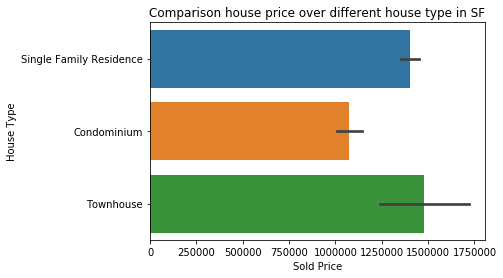

In [40]:
#Comparison over different house type in SF
sns.barplot(x='Sold Price',y='House Type',data=csv,orient='h')
plt.title('Comparison house price over different house type in SF')
plt.show()

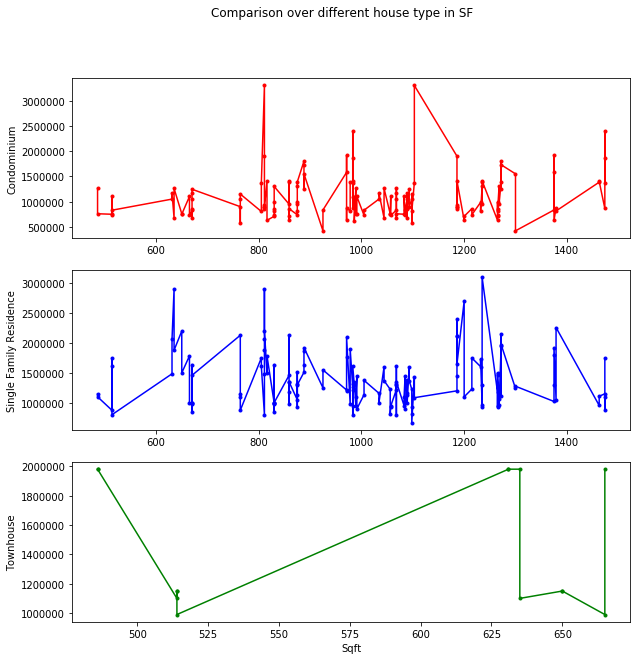

In [31]:
a = csv.loc[csv['House Type']==('Condominium')]['Sold Price']
s1 = csv.loc[csv['House Type']==('Condominium')]['Sqft']
x1 = s1.sort_values(ascending=True)
b = csv.loc[csv['House Type']==('Single Family Residence')]['Sold Price']
s2 = csv.loc[csv['House Type']==('Single Family Residence')]['Sqft']
x2 = s1.sort_values(ascending=True)
c = csv.loc[csv['House Type']==('Townhouse')]['Sold Price']
s3 = csv.loc[csv['House Type']==('Townhouse')]['Sqft']
x3 = s1.sort_values(ascending=True)
fig,ax=plt.subplots(3,1,figsize = (10,10))
ax[0].plot(x1.iloc[:150],a.iloc[:150], 'r.-')
ax[0].set_ylabel('Condominium')
ax[1].plot(x2.iloc[:150],b.iloc[:150], 'b.-')
ax[1].set_ylabel('Single Family Residence')
ax[2].plot(x3.iloc[:14],c.iloc[:14],'g.-')
ax[2].set_ylabel('Townhouse')
ax[2].set_xlabel('Sqft')

fig.suptitle('Comparison over different house type in SF')

plt.show()

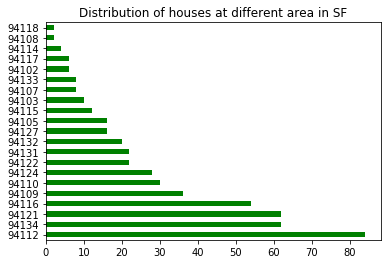

In [39]:
#Comparison over different area in SF
Series = csv['Zip Code'].value_counts()
Series.plot(kind="barh",color='g')
plt.title('Distribution of houses at different area in SF')
plt.show()

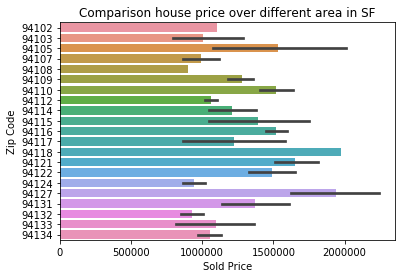

In [38]:
#Comparison over different area in SF
sns.barplot(x='Sold Price',y='Zip Code',data=csv,orient='h')
plt.title('Comparison house price over different area in SF')
plt.show()

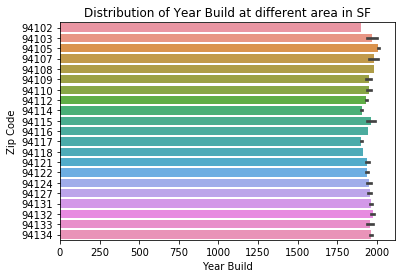

In [41]:
#Year Build vs different area in SF
sns.barplot(x='Year Build',y='Zip Code',data=csv,orient='h')
#sns.set(rc={'figure.figsize':(10,10)})
plt.title('Distribution of Year Build at different area in SF')
plt.show()

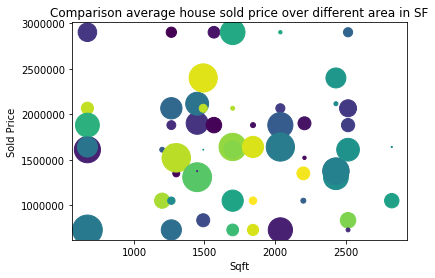

In [12]:
#Sold Price vs Sqart Foot in SF at area 94112
z = csv.loc[csv['Zip Code']== 94121]
x = z['Sqft'].sort_values(ascending=True)
y = z['Sold Price']
N = 62
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # marker size in units of point **2. 

plt.scatter(x, y, s=area, c=colors, alpha=1) 
plt.title('Comparison average house sold price over different area in SF')
plt.xlabel("Sqft")
plt.ylabel("Sold Price") 
plt.show()

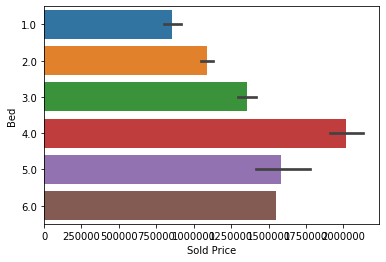

In [13]:
#Sold Price vs Bed room number
sns.barplot(x='Sold Price',y='Bed',data=csv,orient='h')
#sns.set(rc={'figure.figsize':(10,10)})
plt.show()

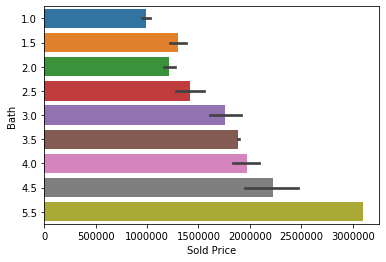

In [14]:
#Sold Price vs Bath room number
sns.barplot(x='Sold Price',y='Bath',data=csv,orient='h')
#sns.set(rc={'figure.figsize':(10,10)})
plt.show()

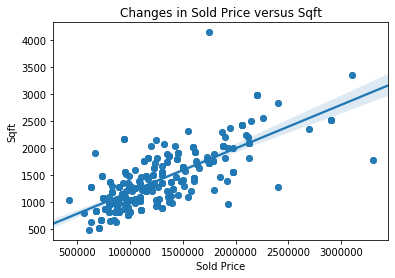

In [15]:
#Sqft vs Sold Price
sns.regplot('Sold Price','Sqft',data=csv)
plt.title('Changes in %s versus %s' %('Sold Price','Sqft'))
plt.show()

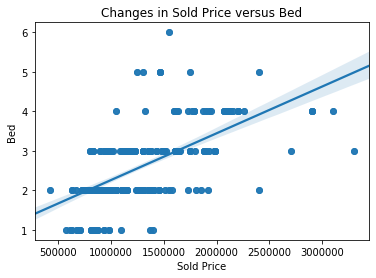

In [17]:
#Bed room number vs Sold Price
sns.regplot('Sold Price','Bed',data=csv)
plt.title('Changes in %s versus %s' %('Sold Price','Bed'))
plt.show()

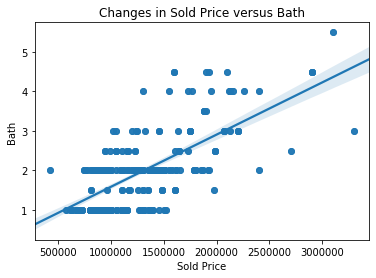

In [22]:
#Bath room number vs Sold Price
sns.regplot('Sold Price','Bath',data=csv)
plt.title('Changes in %s versus %s' %('Sold Price','Bath'))
plt.show()